Датасет не найден. Используйте реальный датасет для работы.
Проверка на пропущенные значения:
brand                  0
model                  0
year                   0
mileage                0
engine_volume          0
horsepower             0
transmission           0
fuel_type              0
color                  0
region                 0
price                  0
sold                   0
economic_indicator1    0
economic_indicator2    0
dtype: int64
Оценка качества модели регрессии:
MAE: 682148.3151
MSE: 663447115423.9509
RMSE: 814522.6303939939
R^2 Score: -0.07580210968559475

Оценка качества модели классификации:
              precision    recall  f1-score   support

           0       0.57      0.06      0.11        68
           1       0.67      0.98      0.79       132

    accuracy                           0.67       200
   macro avg       0.62      0.52      0.45       200
weighted avg       0.64      0.67      0.56       200

Confusion Matrix:
[[  4  64]
 [  3 129]]

Важно

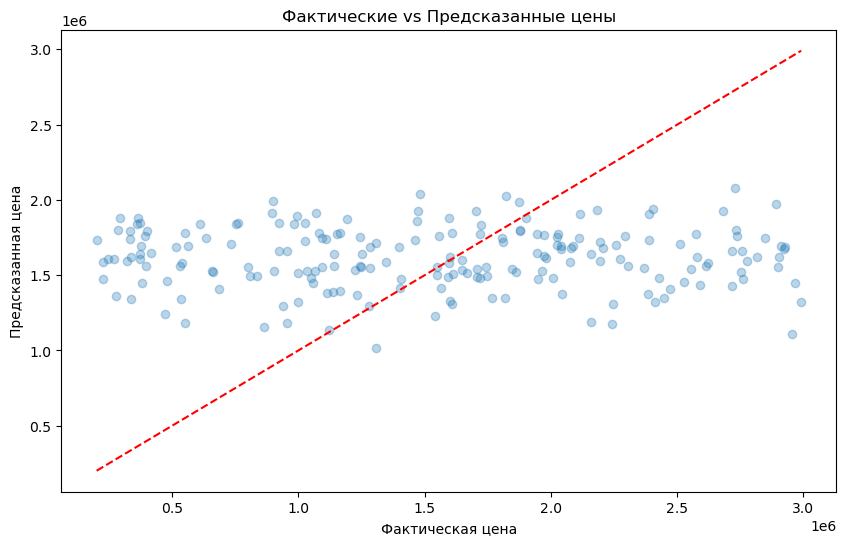

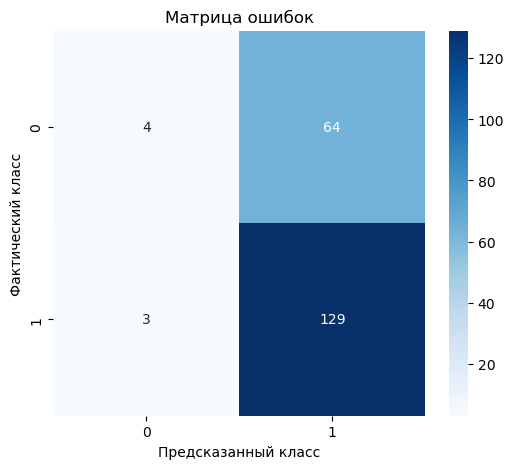

TypeError: unhashable type: 'list'

In [1]:
# Цель данного проекта — разработать модель для прогнозирования цен и вероятности продажи подержанных автомобилей на российском рынке. Мы будем использовать методы машинного обучения для анализа данных об автомобилях и экономических показателях.


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


try:
    df = pd.read_csv('used_cars_data.csv')  # Датасет с данными о подержанных автомобилях
except FileNotFoundError:
    print("Датасет не найден. Используйте реальный датасет для работы.")

df = pd.DataFrame({
    'brand': np.random.choice(['Toyota', 'BMW', 'Lada', 'Hyundai'], 1000),
    'model': np.random.choice(['Model A', 'Model B', 'Model C'], 1000),
    'year': np.random.randint(2000, 2021, 1000),
    'mileage': np.random.randint(0, 200000, 1000),
    'engine_volume': np.random.uniform(1.0, 4.5, 1000),
    'horsepower': np.random.randint(70, 400, 1000),
    'transmission': np.random.choice(['Автоматическая', 'Механическая'], 1000),
    'fuel_type': np.random.choice(['Бензин', 'Дизель', 'Электро'], 1000),
    'color': np.random.choice(['Белый', 'Черный', 'Серый', 'Красный'], 1000),
    'region': np.random.choice(['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург'], 1000),
    'price': np.random.randint(200000, 3000000, 1000),
    'sold': np.random.choice([0, 1], 1000, p=[0.3, 0.7])  # Примерная вероятность продажи
})


economic_data = pd.DataFrame({
    'region': ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург'],
    'economic_indicator1': [0.8, 0.7, 0.5, 0.6],
    'economic_indicator2': [0.2, 0.3, 0.5, 0.4]
})


df_full = pd.merge(df, economic_data, on='region', how='left')


print("Проверка на пропущенные значения:")
print(df_full.isnull().sum())

df_full.dropna(inplace=True)

categorical_features = ['brand', 'model', 'transmission', 'fuel_type', 'color', 'region']

# Применяем Label Encoding к категориальным признакам
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_full[col] = le.fit_transform(df_full[col])
    label_encoders[col] = le

numerical_features = ['year', 'mileage', 'engine_volume', 'horsepower', 'economic_indicator1', 'economic_indicator2']

# Применяем StandardScaler
scaler = StandardScaler()
df_full[numerical_features] = scaler.fit_transform(df_full[numerical_features])


target_price = 'price'
target_sold = 'sold'  # Бинарный признак: 1 - продан, 0 - не продан

features = df_full.drop(columns=[target_price, target_sold])

X_reg = features
y_reg = df_full[target_price]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

X_clf = features
y_clf = df_full[target_sold]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_reg.predict(X_test_reg)

print("Оценка качества модели регрессии:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf, y_train_clf)

y_pred_clf = rf_clf.predict(X_test_clf)

print("\nОценка качества модели классификации:")
print(classification_report(y_test_clf, y_pred_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_clf, y_pred_clf))

importances_reg = rf_reg.feature_importances_
indices_reg = np.argsort(importances_reg)[::-1]

print("\nВажность признаков для задачи регрессии:")
for f in range(features.shape[1]):
    print(f"{f + 1}. {features.columns[indices_reg[f]]} ({importances_reg[indices_reg[f]]:.4f})")


importances_clf = rf_clf.feature_importances_
indices_clf = np.argsort(importances_clf)[::-1]

print("\nВажность признаков для задачи классификации:")
for f in range(features.shape[1]):
    print(f"{f + 1}. {features.columns[indices_clf[f]]} ({importances_clf[indices_clf[f]]:.4f})")

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Фактическая цена')
plt.ylabel('Предсказанная цена')
plt.title('Фактические vs Предсказанные цены')
plt.show()


plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_clf, y_pred_clf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.title('Матрица ошибок')
plt.show()


def predict_new_car(new_car_data):
    # Предобработка новых данных
    for col in categorical_features:
        le = label_encoders[col]
        if new_car_data[col] in le.classes_:
            new_car_data[col] = le.transform([new_car_data[col]])[0]
        else:
            # Если новая категория, то добавляем ее в существующие классы
            le.classes_ = np.append(le.classes_, new_car_data[col])
            new_car_data[col] = le.transform([new_car_data[col]])[0]
    # Масштабирование числовых признаков
    new_car_data_scaled = new_car_data.copy()
    new_car_data_scaled[numerical_features] = scaler.transform([new_car_data[numerical_features]])
    # Преобразуем в DataFrame
    new_car_df = pd.DataFrame([new_car_data_scaled])
    # Прогноз цены
    predicted_price = rf_reg.predict(new_car_df)[0]
    # Прогноз вероятности продажи
    predicted_sold_proba = rf_clf.predict_proba(new_car_df)[0][1]
    return predicted_price, predicted_sold_proba

new_car = {
    'brand': 'Toyota',
    'model': 'Model A',
    'year': 2018,
    'mileage': 30000,
    'engine_volume': 2.0,
    'horsepower': 150,
    'transmission': 'Автоматическая',
    'fuel_type': 'Бензин',
    'color': 'Белый',
    'region': 'Москва',
    'economic_indicator1': 0.8,  # Примерные значения для Москвы
    'economic_indicator2': 0.2
}

pred_price, pred_sold_proba = predict_new_car(new_car)
print(f"\nПрогнозируемая цена: {pred_price:.2f} руб.")
print(f"Вероятность продажи: {pred_sold_proba * 100:.2f}%")

